\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on the Short-Time Fourier Transform for the DSP Autumn 2015 session.

# Section 1

In [1]:
%load_ext oct2py.ipython

%pylab --no-import-all inline
import matplotlib.pyplot as plt

from scikits.talkbox import lpc, segment_axis, lpcres, slfilter
from scipy.io import wavfile
from scipy.signal import lfilter, cwt, ricker
from pywt import wavedec, Wavelet

%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%octave -o wave
pkg load signal
wave = wavread('/Users/proffan/Downloads/example.wav');

16935

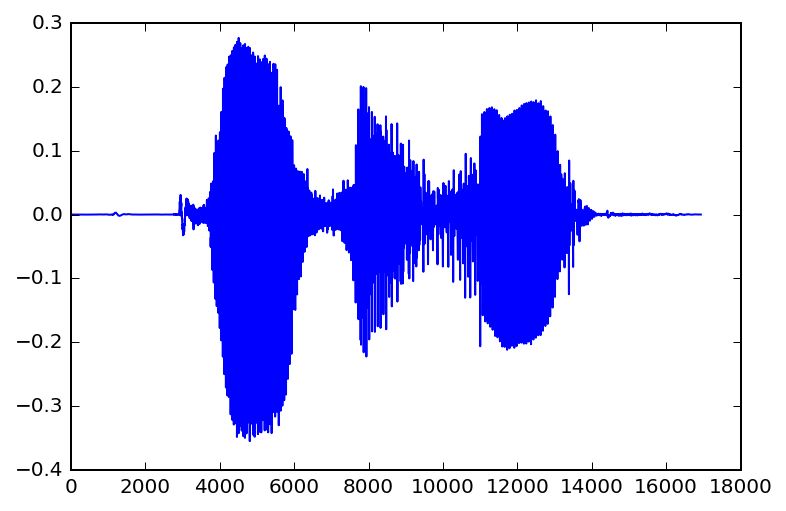

In [3]:
wave=np.asarray(wave);
plt.plot(wave);
len(wave)

In [4]:
segs = []
for i in range(int(len(wave)/(16000*0.01))):
    segs.append(wave[i*16000/1000:(i+50)*16000/1000])

In [5]:
ffts = []
for i in range(len(segs)):
    ffts.append(np.absolute(np.fft.fft(segs[i].T,1024)))
len(ffts)

105

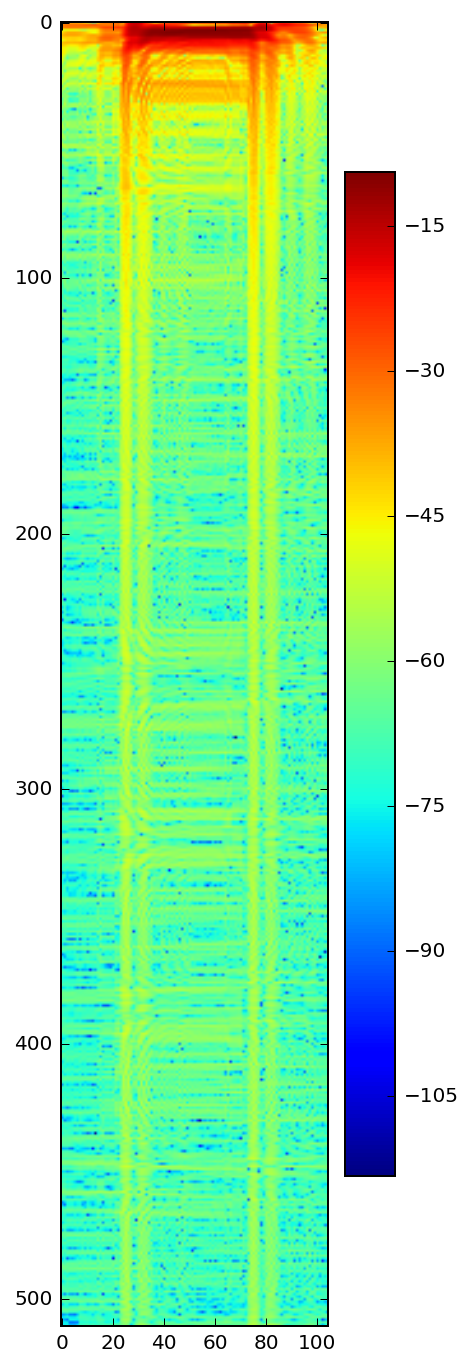

In [6]:
plt.figure(figsize=(3,20))
plt.imshow(20*np.log10(np.abs(np.asarray(ffts))[:,0,0:511]).T)
plt.jet()
plt.colorbar()

# Section 2

In [7]:
%%octave -o wave
pkg load signal
wave = wavread('/Users/proffan/Downloads/example.wav');

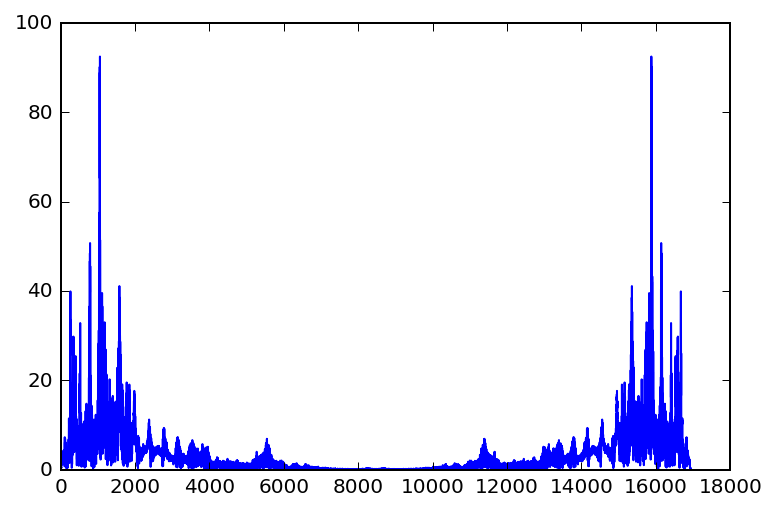

In [8]:
plt.plot(range(len(np.fft.fft(np.absolute(wave.T[0])))),np.absolute(np.fft.fft(wave.T[0])))

When the width of window $N=512$

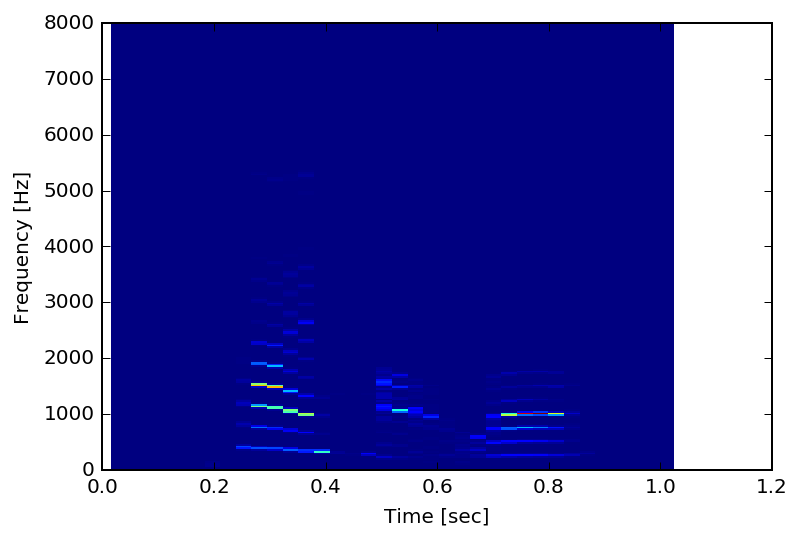

In [10]:
from scipy.signal import spectrogram,get_window
f, t, Sxx = spectrogram(wave.T[0],fs=16000,window=get_window('hamming',512),nperseg=512)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

We can see that the frequency resolution is very high.

When $N=256$

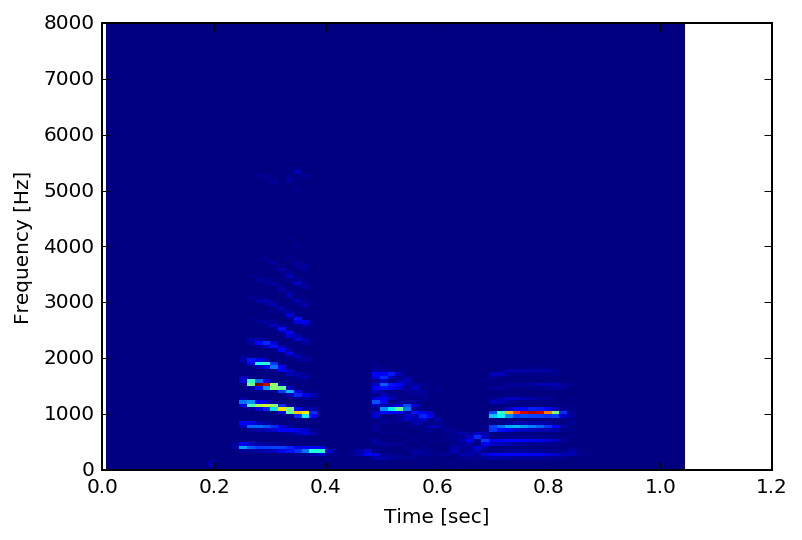

In [11]:
from scipy.signal import spectrogram
f, t, Sxx = spectrogram(wave.T[0],fs=16000,window=get_window('hamming',256),nperseg=256)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

The time resolution increases while the frequecy difference gets dimmer.

When $N=128$

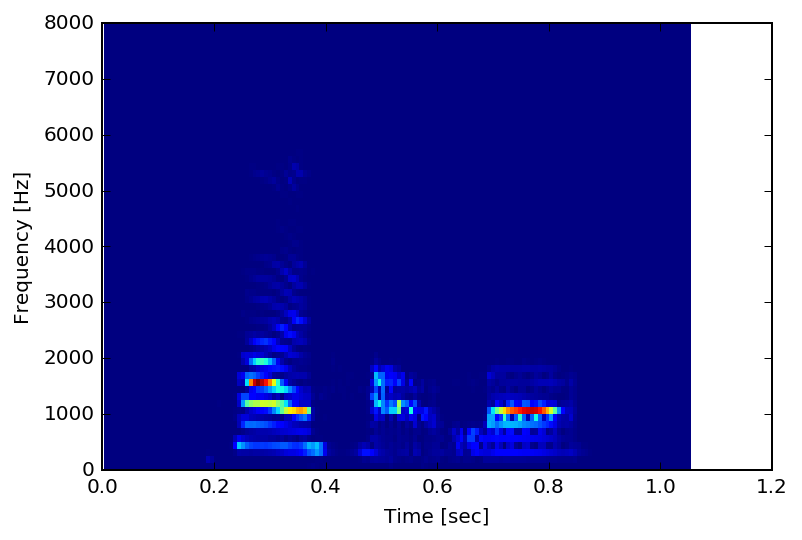

In [12]:
from scipy.signal import spectrogram
f, t, Sxx = spectrogram(wave.T[0],fs=16000,window=get_window('hamming',128),nperseg=128)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

We can see that time resolution increases further but the frequency resolution is poor.

Then we will try to use the CWT:

In [13]:
%load_ext cython


In [33]:
%%cython --annotate
from scipy.signal import cwt
from scipy.signal import morlet
import numpy as np
cimport numpy as np

cpdef doit(np.ndarray[double, ndim=1] w):
    return cwt(w,morlet,[8,16,32,64,128,256,512,1024,2048,4096])

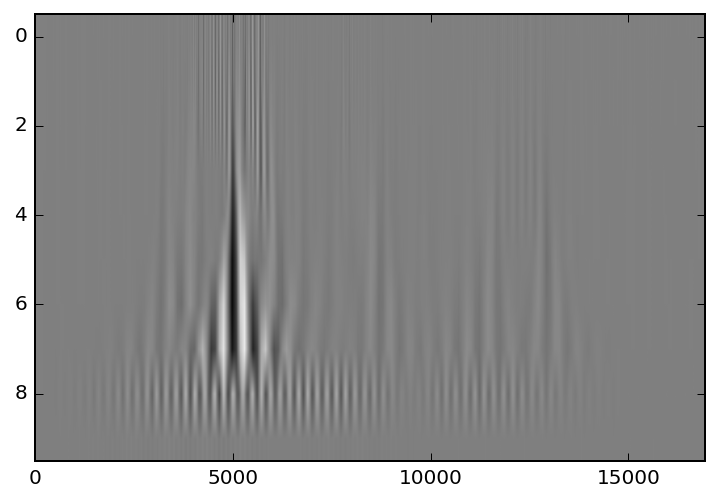

In [31]:
cwtmatr=doit(wave.T[0])
plt.imshow(cwtmatr, cmap='gray', aspect='auto',
    vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

It shows that the CWT has good time resolution, but is more computationally intensive.